In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

# Pytorch Workflow

exploring [pytorch](https://pytorch.org)
from udemy course pytoch for Deep Learning Bootcamp

In [3]:
what_is_covered = {1: "data (preparing and loading)",
                   2: "build Model",
                   3: "training model or fitting the model to the data",
                   4: "make predictions and evaluating and a model", 
                   5: "save and load model", 
                   6: "putting it all together"}
what_is_covered

{1: 'data (preparing and loading)',
 2: 'build Model',
 3: 'training model or fitting the model to the data',
 4: 'make predictions and evaluating and a model',
 5: 'save and load model',
 6: 'putting it all together'}

In [4]:
## Neural Network

from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu124'

## 1. Data (preparing and loading)

data can be anything in machine learning

most popular data
* Excel spreadsheet
* Images
* Videos
* Audio
* Text

Machine Learning is a game
1. Get data into a numerical representation.
2. build a model to learn patterns in the numerical rep.

to showcase, lets create the following data using linear regression formula

Y = a + bX

In [5]:
# Create known parameters

weight  = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test set

create a training and test set with our data

In [6]:
# create train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Visualize data

data explorer motto :
visualize, visualize, visualize


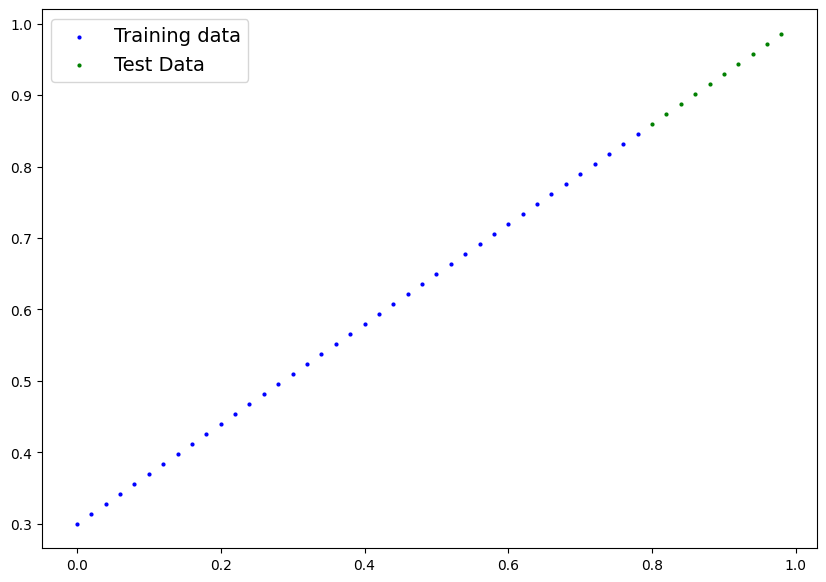

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    
    # set up plot
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")

    # apakah ada prediksi?
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # show legends
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions()

## 2. Build Model

first pytoch model

what our model does:
* start from random values (weight and bias)
* look at training data and adjust the random values to better represent or get closer to the ideal values

how does it do so?

through two main algorithms:
1. gradient descend
2. backpropagation

In [8]:
# Create a linear reggression model class
import torch.nn as nn

class LinearReggressionModel(nn.Module): # almost everything in Pytorch inherits nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with random values
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, # started with random values
                                            requires_grad=True,
                                            dtype=torch.float))

    # Foward untuk menjelaskan komputasi dalam model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" adalah input data
        return self.weights * x + self.bias

### Pytorch model building essentials

* torch.nn - all of computational neural networks
* torch.nn.parameters - what parameters should our model try and learn, often pytorch layer from torch.nn
* torch.nn.module - the base class for all neural network modules, if you subclass it, you should overwrite foward
* torch.optim - pytorch optimizer, same as optimizer in tensorflow
* def foward - all nn.modules subclasses require to overwrite foward, this defines what happens in the foward computation

### cek model pytorch

lihat isi dari model pytorch ini

bisa cek parameter atau apa isi dari model pake .parameters()

In [45]:
# create random seed
torch.manual_seed(42)

# create instance dari model (subclass nn.module)
model_0 = LinearReggressionModel()

# cek parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [46]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### buat prediksi tanpa training, ini bisa di pytorch tidak di tensorflow

cek predictive power dari model tersebut, prediksi y_test berdasarkan x_test

pass data lewat model kita, lewat method foward

In [47]:
# make prediksi with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [36]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

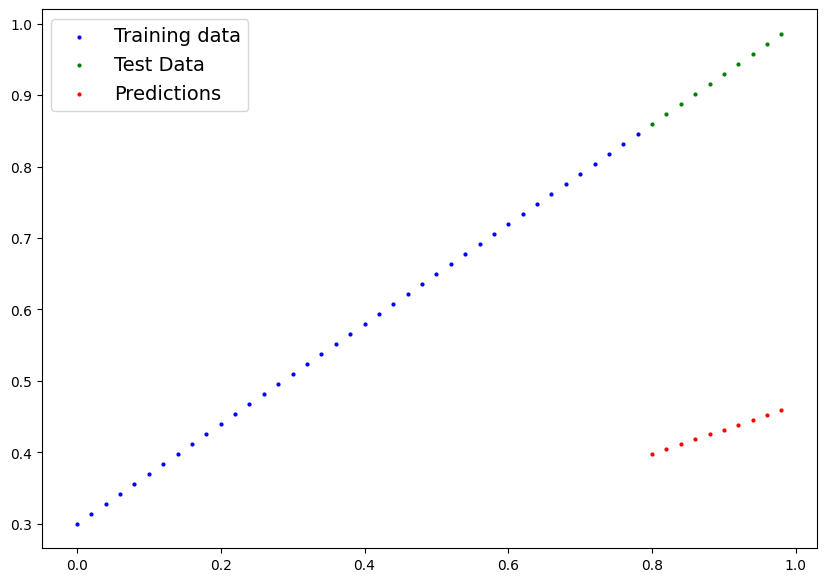

In [48]:
plot_predictions(predictions=y_preds)

hasilnya shocking wkwk

## 3. Train model

ya model training lah ya, biar nilai prediksinya bagus

pake loss function atau cost function atau criterion. buat ini bakalan di sebut loss function

hal yang perlu di training
* loss function
* optimizer

untuk training dibutuhkan
* training loop
* testing loop

In [49]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [51]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (pake SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

### Bikin Training Loop Pytorch dan testing loop

beberapa yang dibutuhin untuk training loop:
1. Loop through the data
2. Foward pass (masukin data lewat forward func)
3. calculate the loss (compare forward pass predictions to ground truth labels)
4. optimizer zero grad
5. loss backward - move backwards through the network to calculate the gradients of the parameter from our model with respect to the loss (Backpropagation)
6. optimizer step - use optimizer for improve the loss (gradient descent)

In [66]:
torch.manual_seed(42)
# epoch adalah looping through the data, epochs adalah hyperparameter
epochs = 1000

# track 
epoch_count = []
loss_values = []
test_loss_values = []

## training
# 1. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in pytorch set all parameters that require gradients
    # 2. forward pass
    y_pred = model_0(X_train)
    # 3. calculate loss
    loss = loss_fn(y_pred, Y_train)
    # 4. optimizer zero grad
    optimizer.zero_grad()
    # 5. perform backpropagation on the loss with respect to the parameter of the model
    loss.backward()
    # 6. step the optimizer untuk perform gradient descent
    optimizer.step()

    ## testing code
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(X_test)
        # 2. calculate loss
        test_loss = loss_fn(test_pred, Y_test)
        
    #print semua biar tau
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.02435956709086895 | Test Loss: 0.05690721794962883
OrderedDict([('weights', tensor([0.5790])), ('bias', tensor([0.3508]))])
Epoch: 10 | Loss: 0.024016480892896652 | Test Loss: 0.05607985332608223
OrderedDict([('weights', tensor([0.5807])), ('bias', tensor([0.3501]))])
Epoch: 20 | Loss: 0.02367258258163929 | Test Loss: 0.055252473801374435
OrderedDict([('weights', tensor([0.5824])), ('bias', tensor([0.3494]))])
Epoch: 30 | Loss: 0.023329313844442368 | Test Loss: 0.054493773728609085
OrderedDict([('weights', tensor([0.5841])), ('bias', tensor([0.3487]))])
Epoch: 40 | Loss: 0.022986043244600296 | Test Loss: 0.05366641283035278
OrderedDict([('weights', tensor([0.5858])), ('bias', tensor([0.3480]))])
Epoch: 50 | Loss: 0.022642139345407486 | Test Loss: 0.05283904820680618
OrderedDict([('weights', tensor([0.5875])), ('bias', tensor([0.3473]))])
Epoch: 60 | Loss: 0.02229905314743519 | Test Loss: 0.05208033323287964
OrderedDict([('weights', tensor([0.5892])), ('bias', tensor(

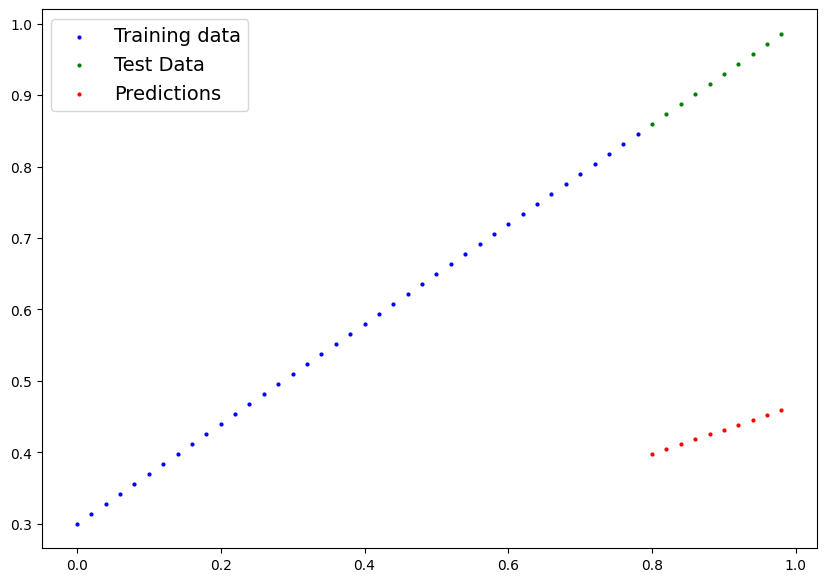

In [67]:
plot_predictions(predictions=y_preds)

In [69]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

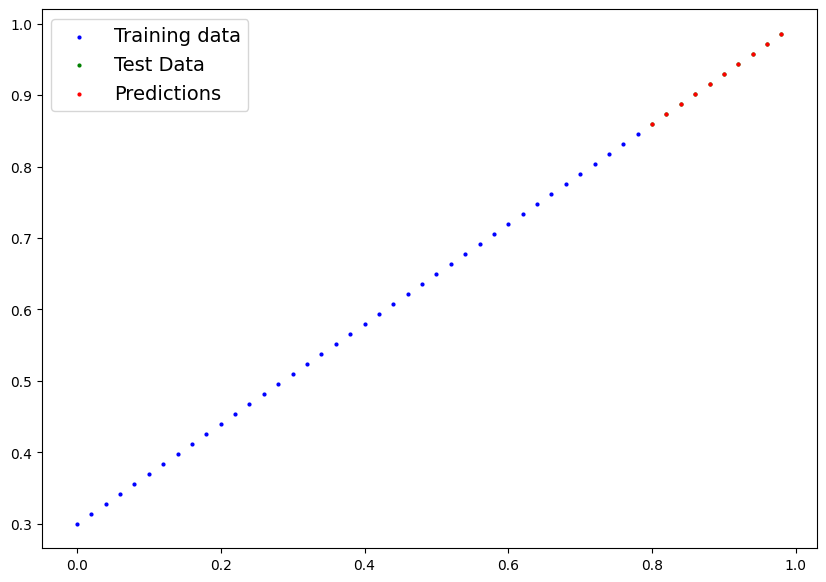

In [70]:
plot_predictions(predictions=y_preds_new)

In [71]:
import numpy as np

In [72]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.02435957, 0.02401648, 0.02367258, 0.02332931, 0.02298604,
        0.02264214, 0.02229905, 0.02195561, 0.02161171, 0.0212688 ,
        0.02092517, 0.0205814 , 0.02023854, 0.01989474, 0.01955115,
        0.01920821, 0.0188643 , 0.01852089, 0.01817777, 0.01783386,
        0.01749063, 0.01714733, 0.01680343, 0.01646037, 0.0161169 ,
        0.015773  , 0.01543011, 0.01508646, 0.01474272, 0.01439985,
        0.01405602, 0.01371246, 0.01336949, 0.01302559, 0.0126822 ,
        0.01233906, 0.01199516, 0.01165195, 0.01130863, 0.01096472,
        0.01062168, 0.01027819, 0.00993429, 0.00959143, 0.00924775,
        0.00890404, 0.00856117, 0.00821732, 0.00787378, 0.00753079,
        0.00718688, 0.00684352, 0.00650035, 0.00615644, 0.00581326,
        0.00546991, 0.00512601, 0.00478274, 0.0044393 , 0.00409621,
        0.00375231, 0.00340905, 0.00306577, 0.00272187, 0.00237879,
        0.00203534, 0.00169144, 0.00134853, 0.0010049 , 0.00066164,
        0.00031773, 0.0004445 , 0.0004445 , 0.00

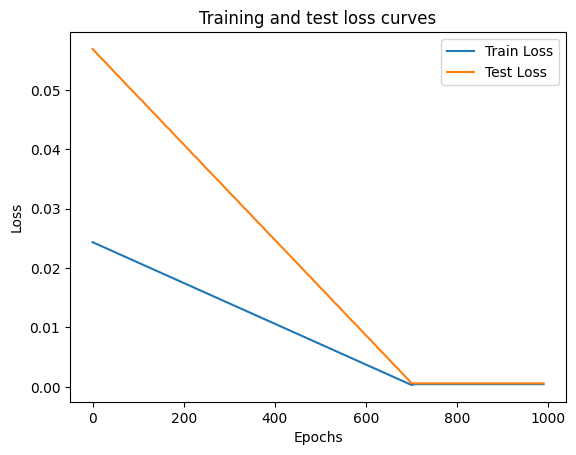

In [73]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();